In [1]:
from mnist import MNIST
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras import models, layers, Sequential
from keras import optimizers
import keras
import matplotlib.pyplot as plt

# Wget to save mnist train and test data under /nfs/Workspace/mndata/

mndata = MNIST('/nfs/Workspace/mndata/')
raw_train_images, raw_train_labels = mndata.load_training()

In [2]:
train_labels = np.array(raw_train_labels)
train_images = np.array(raw_train_images)

# Random select 50000 from taining set

rng = np.random.default_rng()
test_index = rng.choice(len(train_images), 10000, replace=False)
test_labels = []
test_images = []
# Get 10000 from training set for testing set
for index in test_index:
    test_labels.append(train_labels[index])
    test_images.append(train_images[index])

train_labels = np.delete(train_labels, test_index)
train_images = np.delete(train_images, test_index,axis=0)
test_labels = np.array(test_labels)
test_images = np.array(test_images)


print(len(test_index), train_labels.shape, train_images.shape)
print(len(test_index), test_labels.shape, test_images.shape)

10000 (50000,) (50000, 784)
10000 (10000,) (10000, 784)


In [3]:
# Reshape images data for training

train_images = train_images.reshape(-1, 28, 28,1)
print(train_images.shape, train_labels.shape)

test_images = test_images.reshape(-1, 28, 28, 1)
print(test_images.shape,test_labels.shape)


(50000, 28, 28, 1) (50000,)
(10000, 28, 28, 1) (10000,)


In [4]:
# Categorical labels to 10 classes
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [5]:
# Build batch-normalized model
# Use tow hidden layer with activation "relu" and neurl number 100
bn_model = keras.models.Sequential()
bn_model.add(keras.layers.normalization.BatchNormalization(input_shape=(28, 28, 1),axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
bn_model.add(keras.layers.Dense(100, activation="relu"))
bn_model.add(Flatten())
bn_model.add(keras.layers.Dense(100, activation="relu"))
bn_model.add(keras.layers.Dense(10, activation="softmax"))
# optimizer use sgd (strogatic gradient descent)
bn_model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
bn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
dense (Dense)                (None, 28, 28, 100)       200       
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               7840100   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,841,314
Trainable params: 7,841,312
Non-trainable params: 2
_________________________________________________________________


In [6]:
# Train batch-normalized 
# Use epochs 100, batch size 500
bn_history = bn_model.fit(train_images, train_labels, epochs=100, 
    batch_size=500, validation_data=(test_images, test_labels), 
    verbose=1, shuffle=True)

Epoch 1/100
100/100 [==============================] - 11s 53ms/step - loss: 1.2297 - accuracy: 0.7043 - val_loss: 0.4065 - val_accuracy: 0.8766
Epoch 2/100
100/100 [==============================] - 4s 37ms/step - loss: 0.3785 - accuracy: 0.8940 - val_loss: 0.3381 - val_accuracy: 0.8994
Epoch 3/100
100/100 [==============================] - 5s 46ms/step - loss: 0.3175 - accuracy: 0.9097 - val_loss: 0.3024 - val_accuracy: 0.9118
Epoch 4/100
100/100 [==============================] - 3s 33ms/step - loss: 0.2814 - accuracy: 0.9184 - val_loss: 0.2807 - val_accuracy: 0.9178
Epoch 5/100
100/100 [==============================] - 3s 32ms/step - loss: 0.2540 - accuracy: 0.9285 - val_loss: 0.2655 - val_accuracy: 0.9228
Epoch 6/100
100/100 [==============================] - 4s 39ms/step - loss: 0.2367 - accuracy: 0.9334 - val_loss: 0.2467 - val_accuracy: 0.9295
Epoch 7/100
100/100 [==============================] - 4s 38ms/step - loss: 0.2191 - accuracy: 0.9381 - val_loss: 0.2358 - val_accuracy

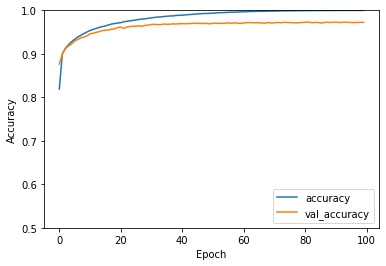

In [7]:
# Plot training accuracy and validation accuracy
plt.plot(bn_history.history['accuracy'], label='accuracy')
plt.plot(bn_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

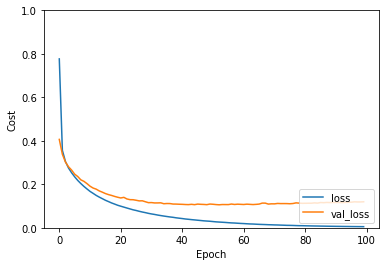

In [10]:
# Plot training loss and validation loss
plt.plot(bn_history.history['loss'], label='loss')
plt.plot(bn_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')